In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [5]:
train = pd.read_csv('/content/drive/My Drive/Colab Notebooks/DSNP/Projetos individuais/data/Safra_2018-2019.csv')
test = pd.read_csv('/content/drive/My Drive/Colab Notebooks/DSNP/Projetos individuais/data/Safra_2020.csv')
train.head()

,Unnamed: 0,Identificador_Agricultor,Estimativa_de_Insetos,Tipo_de_Cultivo,Tipo_de_Solo,Categoria_Pesticida,Doses_Semana,Semanas_Utilizando,Semanas_Sem_Uso,Temporada,dano_na_plantacao
0,0,SCROP00001,188,1,0,1,0,0.0,0,1,0
1,1,SCROP00002,209,1,0,1,0,0.0,0,2,1
2,2,SCROP00003,257,1,0,1,0,0.0,0,2,1
3,3,SCROP00004,257,1,1,1,0,0.0,0,2,1
4,4,SCROP00005,342,1,0,1,0,0.0,0,2,1


Analisando dimenções do dataframe

In [6]:
print("Variáveis:\t{}\nEntradas:\t{}".format(train.shape[1], train.shape[0]))

Variáveis:	11
Entradas:	80000


Análisando valores nulos e valores únicos presentes no dataset

In [7]:
train.dtypes

Unnamed: 0                    int64
Identificador_Agricultor     object
Estimativa_de_Insetos         int64
Tipo_de_Cultivo               int64
Tipo_de_Solo                  int64
Categoria_Pesticida           int64
Doses_Semana                  int64
Semanas_Utilizando          float64
Semanas_Sem_Uso               int64
Temporada                     int64
dano_na_plantacao             int64
dtype: object

In [8]:
train.isnull().sum()/train.shape[0]

Unnamed: 0                  0.000000
Identificador_Agricultor    0.000000
Estimativa_de_Insetos       0.000000
Tipo_de_Cultivo             0.000000
Tipo_de_Solo                0.000000
Categoria_Pesticida         0.000000
Doses_Semana                0.000000
Semanas_Utilizando          0.100687
Semanas_Sem_Uso             0.000000
Temporada                   0.000000
dano_na_plantacao           0.000000
dtype: float64

In [9]:
median = train.Semanas_Utilizando.median()
train = train.fillna({"Semanas_Utilizando": median})
train.isnull().sum()

Unnamed: 0                  0
Identificador_Agricultor    0
Estimativa_de_Insetos       0
Tipo_de_Cultivo             0
Tipo_de_Solo                0
Categoria_Pesticida         0
Doses_Semana                0
Semanas_Utilizando          0
Semanas_Sem_Uso             0
Temporada                   0
dano_na_plantacao           0
dtype: int64

In [10]:
train.describe()

,Unnamed: 0,Estimativa_de_Insetos,Tipo_de_Cultivo,Tipo_de_Solo,Categoria_Pesticida,Doses_Semana,Semanas_Utilizando,Semanas_Sem_Uso,Temporada,dano_na_plantacao
count,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000,80000.000000
mean,39999.500000,1400.020875,0.283338,0.455550,2.267587,25.846750,28.597575,9.549088,1.897575,0.192312
std,23094.155105,849.792471,0.450622,0.498023,0.463748,15.557246,11.784339,9.905547,0.702079,0.455912
min,0.000000,150.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,19999.750000,731.000000,0.000000,0.000000,2.000000,15.000000,20.000000,0.000000,1.000000,0.000000
50%,39999.500000,1212.000000,0.000000,0.000000,2.000000,20.000000,28.000000,7.000000,2.000000,0.000000
75%,59999.250000,1898.000000,1.000000,1.000000,3.000000,40.000000,36.000000,16.000000,2.000000,0.000000
max,79999.000000,4097.000000,1.000000,1.000000,3.000000,95.000000,67.000000,50.000000,3.000000,2.000000


In [11]:
print("Valores únicos:")
print(train.nunique().sort_values())

Valores únicos:
Tipo_de_Cultivo                 2
Tipo_de_Solo                    2
Categoria_Pesticida             3
Temporada                       3
dano_na_plantacao               3
Doses_Semana                   20
Semanas_Sem_Uso                51
Semanas_Utilizando             64
Estimativa_de_Insetos          71
Unnamed: 0                  80000
Identificador_Agricultor    80000
dtype: int64


In [12]:
train.head()

,Unnamed: 0,Identificador_Agricultor,Estimativa_de_Insetos,Tipo_de_Cultivo,Tipo_de_Solo,Categoria_Pesticida,Doses_Semana,Semanas_Utilizando,Semanas_Sem_Uso,Temporada,dano_na_plantacao
0,0,SCROP00001,188,1,0,1,0,0.0,0,1,0
1,1,SCROP00002,209,1,0,1,0,0.0,0,2,1
2,2,SCROP00003,257,1,0,1,0,0.0,0,2,1
3,3,SCROP00004,257,1,1,1,0,0.0,0,2,1
4,4,SCROP00005,342,1,0,1,0,0.0,0,2,1


Pré-processamento do dataframe para criação do modelo de machine learning

In [13]:
train.drop(labels=['Unnamed: 0', 'Identificador_Agricultor'], axis=1, inplace=True)

In [14]:
train = pd.get_dummies(train, columns=['Tipo_de_Cultivo', 'Tipo_de_Solo', 'Categoria_Pesticida', 'Temporada'])

In [15]:
train.head()

,Estimativa_de_Insetos,Doses_Semana,Semanas_Utilizando,Semanas_Sem_Uso,dano_na_plantacao,Tipo_de_Cultivo_0,Tipo_de_Cultivo_1,Tipo_de_Solo_0,Tipo_de_Solo_1,Categoria_Pesticida_1,Categoria_Pesticida_2,Categoria_Pesticida_3,Temporada_1,Temporada_2,Temporada_3
0,188,0,0.0,0,0,0,1,1,0,1,0,0,1,0,0
1,209,0,0.0,0,1,0,1,1,0,1,0,0,0,1,0
2,257,0,0.0,0,1,0,1,1,0,1,0,0,0,1,0
3,257,0,0.0,0,1,0,1,0,1,1,0,0,0,1,0
4,342,0,0.0,0,1,0,1,1,0,1,0,0,0,1,0


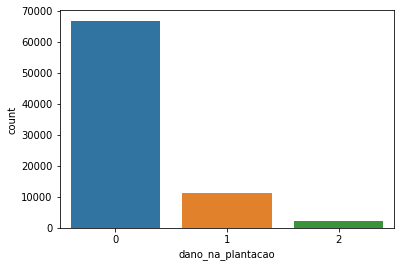

In [16]:
sns.countplot(train['dano_na_plantacao']);

In [17]:
!pip install scikit-plot -q
!pip install imbalanced-learn -q

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import roc_auc_score, accuracy_score, f1_score, confusion_matrix, classification_report
from scikitplot.metrics import plot_confusion_matrix, plot_roc


In [18]:
X = train.drop('dano_na_plantacao', axis=1)
y = train['dano_na_plantacao']

X_train, X_test, y_train, y_test = train_test_split(X, y)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


2    1595
1    1595
0    1595
dtype: int64


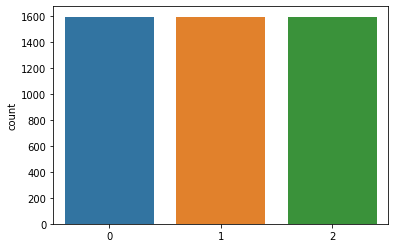

In [19]:
from imblearn.under_sampling import RandomUnderSampler

# usar técnica under-sampling
rus = RandomUnderSampler()
X_res, y_res = rus.fit_sample(X_train, y_train)

# ver o balanceamento das classes
print(pd.Series(y_res).value_counts())

# plotar a nova distribuição de classes
sns.countplot(y_res);

              precision    recall  f1-score   support

           0       0.93      0.64      0.76     16708
           1       0.22      0.38      0.28      2786
           2       0.07      0.52      0.13       506

    accuracy                           0.60     20000
   macro avg       0.41      0.51      0.39     20000
weighted avg       0.81      0.60      0.67     20000



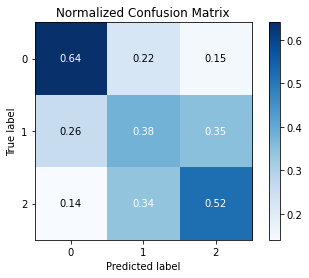

In [20]:
model = RandomForestClassifier()
model3 = DecisionTreeClassifier()

model.fit(X_res, y_res)

y_pred = model.predict(X_test)

# Classification Report
print(classification_report(y_test, y_pred))

# imprimir a área sob a curva
# print("AUC: {:.4f}\n".format(roc_auc_score(y_test, y_pred)))

# plotar matriz de confusão
plot_confusion_matrix(y_test, y_pred, normalize=True)
plt.show()

Fazendo a predição utilizando os dados de 2020

In [25]:
test.isnull().sum()

Unnamed: 0                    0
Identificador_Agricultor      0
Estimativa_de_Insetos         0
Tipo_de_Cultivo               0
Tipo_de_Solo                  0
Categoria_Pesticida           0
Doses_Semana                  0
Semanas_Utilizando          945
Semanas_Sem_Uso               0
Temporada                     0
dtype: int64

In [26]:
median = test.Semanas_Utilizando.median()
test = test.fillna({"Semanas_Utilizando": median})
test.isnull().sum()

Unnamed: 0                  0
Identificador_Agricultor    0
Estimativa_de_Insetos       0
Tipo_de_Cultivo             0
Tipo_de_Solo                0
Categoria_Pesticida         0
Doses_Semana                0
Semanas_Utilizando          0
Semanas_Sem_Uso             0
Temporada                   0
dtype: int64

In [27]:
test.drop(labels=['Unnamed: 0', 'Identificador_Agricultor'], axis=1, inplace=True)

In [30]:
test = pd.get_dummies(test, columns=['Tipo_de_Cultivo', 'Tipo_de_Solo', 'Categoria_Pesticida', 'Temporada'])

In [31]:
test.head()

,Estimativa_de_Insetos,Doses_Semana,Semanas_Utilizando,Semanas_Sem_Uso,Tipo_de_Cultivo_0,Tipo_de_Cultivo_1,Tipo_de_Solo_0,Tipo_de_Solo_1,Categoria_Pesticida_1,Categoria_Pesticida_2,Categoria_Pesticida_3,Temporada_1,Temporada_2,Temporada_3
0,256,35,11.0,9,1,0,0,1,0,1,0,1,0,0
1,283,5,5.0,6,1,0,0,1,0,1,0,1,0,0
2,283,15,15.0,5,1,0,0,1,0,1,0,0,1,0
3,283,15,27.0,7,1,0,0,1,0,1,0,0,1,0
4,283,15,19.0,2,1,0,0,1,0,1,0,1,0,0


In [32]:
predictions = model.predict(test)
print(predictions)

[0 0 0 ... 1 1 1]


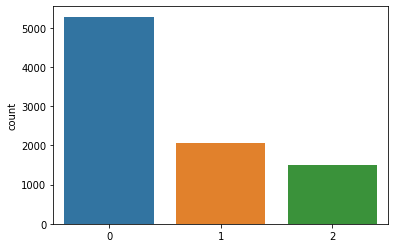

In [35]:
sns.countplot(predictions);

In [38]:
test_pred = test.copy()
test_pred['dano_na_plantacao'] = predictions

In [39]:
test_pred.head()


,Estimativa_de_Insetos,Doses_Semana,Semanas_Utilizando,Semanas_Sem_Uso,Tipo_de_Cultivo_0,Tipo_de_Cultivo_1,Tipo_de_Solo_0,Tipo_de_Solo_1,Categoria_Pesticida_1,Categoria_Pesticida_2,Categoria_Pesticida_3,Temporada_1,Temporada_2,Temporada_3,dano_na_plantacao
0,256,35,11.0,9,1,0,0,1,0,1,0,1,0,0,0
1,283,5,5.0,6,1,0,0,1,0,1,0,1,0,0,0
2,283,15,15.0,5,1,0,0,1,0,1,0,0,1,0,0
3,283,15,27.0,7,1,0,0,1,0,1,0,0,1,0,0
4,283,15,19.0,2,1,0,0,1,0,1,0,1,0,0,0


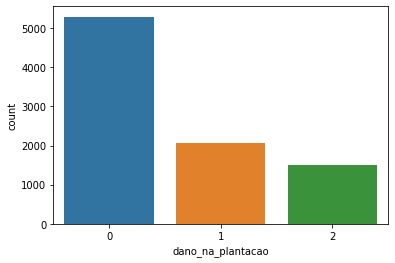

In [40]:
sns.countplot(test_pred['dano_na_plantacao']);